## Understanding Equations of **Uniformly** Accelerated Motion

In Classical Mechanics, there are 3 equations for the motion of bodies which travel with a uniform acceleration. These equations give relationship between initial velocity ($u$), final velocity ($v$), time taken ($t$), acceleration ($a$) and distance ($s$) travelled by the bodies.

\begin{align}
v &= u+at \\[5pt]
s &= ut + \frac{1}{2}at^2 \\[5pt]
v^2 &= u^2 + 2as
\end{align}

**Problem 1**: A racing car has a uniform acceleration of $4\ m/s^2$. What distance will it cover in $10$ seconds after the start?

In [10]:
(1/2) * 4 * 10**2

200.0

In [11]:
# Given information
a = 4 # m/s^2
t = 10 # s
u = 10 # m/s

In [12]:
s = u*t + (1/2) * a * t**2

In [13]:
s

300.0

**Problem 2**: A scooter moving at a speed of $10\ km/hr$ is stopped by applying brakes which produce a uniform acceleration of  $– 0.5\ m/s^2$. How much distance will be covered by the scooter before it stops?

In [14]:
# Given information
u = 10 # km/hr
u = u * 1000 / 3600 # m/s
v = 0 # m/s
a = -0.5 # m/s^2

\begin{align*}
v^2 &= u^2 + 2as \\[5pt]
\implies s &= \frac{v^2 - u^2}{2a}
\end{align*}

In [15]:
s = (v**2 - u**2) / (2*a)

In [16]:
s

7.716049382716049

### Plots

In [17]:
import numpy as np
import matplotlib.pyplot as plt

A racing car has a uniform acceleration of $4\ m/s^2$. What distance will it cover in $10$ seconds after the start?

In [18]:
a = 4 # m/s^2
u = 0 # m/s
t_vals = np.linspace(0, 10, 100) # s
s_vals = []
v_vals = []

for t in t_vals:
    s = u*t + (1/2) * a * t**2
    s_vals.append(s)

    v = u + a*t
    v_vals.append(v)

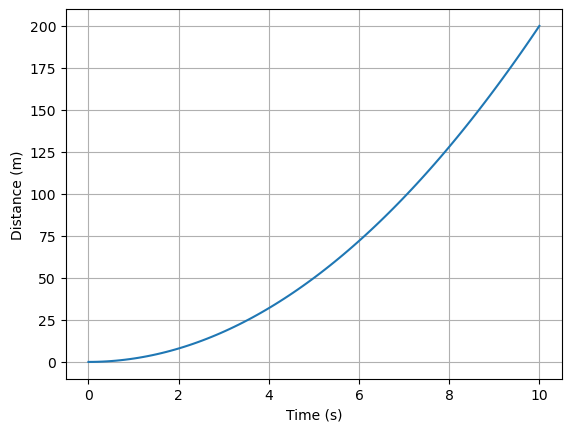

In [19]:
plt.plot(t_vals, s_vals)
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.grid(True)

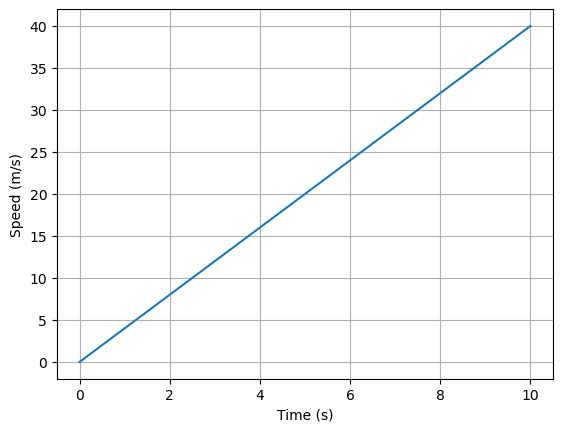

In [20]:
plt.plot(t_vals, v_vals)
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.grid(True)

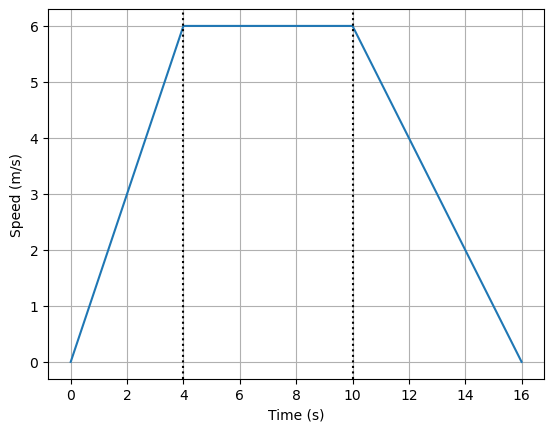

In [21]:

t_vals = np.array([0, 4, 10, 16])
v_vals = np.array([0, 6, 6, 0])

plt.plot(t_vals, v_vals)
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.axvline(4, ls='dotted', color='k'); plt.axvline(10, ls='dotted', color='k')
plt.grid(True)

In [22]:
(6-0)/(4-0)

1.5

## Freely Falling Bodies

For a body falling freely from a certain height, the acceleration is in the vertically downward direction and its magnitude is almost constant if the height is small as compared with the radius of the Earth ($6400\ km$). This magnitude is approximately equal to $9.8\ m/s^2$ and is denoted by the letter $g$.

Let's take the vertically upward as the positive Y-axis. Then acceleration is along the negative Y-axis, hence $a=-g$. Then

\begin{align}
v &= u - gt \\[5pt]
y &= ut - \frac{1}{2}gt^2 \\[5pt]
v^2 &= u^2 - 2gy
\end{align}

**Problem**: A ball is thrown up at a speed of $4\ m/s$. Find the maximum height reached by the ball.

In [23]:
# Given information
u = 4 # m/s
v = 0 # m/s
g = 9.8
a = -g # m/s^2

\begin{align*}
v^2 &= u^2 - 2gh \\[5pt]
h &= \frac{v^2 - u^2}{-2g}
\end{align*}

In [24]:
h = (v**2 - u**2) / (2 * a)

In [25]:
h

0.8163265306122448

\begin{align*}
h(t) &= h_0 + ut + \frac{1}{2}at^2 \\[5pt]
h(t) &= h_0 + ut - \frac{1}{2}gt^2
\end{align*}

In [26]:
def getHeight(h_0, u, a, t):
    h = h_0 + u*t + (1/2)*a*t**2
    return h

def getVelocity(u, a, t):
    v = u + a*t
    return v

In [27]:
u = 4 # m/s
v = 0 # m/s
a = -9.8 # m/s^2
h_0 = 0 # m

time_vals = np.linspace(0, 2, 100)
height_vals = []
vel_vals = []
for t in time_vals:
    h = getHeight(h_0, u, a, t)
    v = getVelocity(u, a, t)

    if h < h_0:
        h = h_0
        v = 0

    height_vals.append(h)    
    vel_vals.append(v)

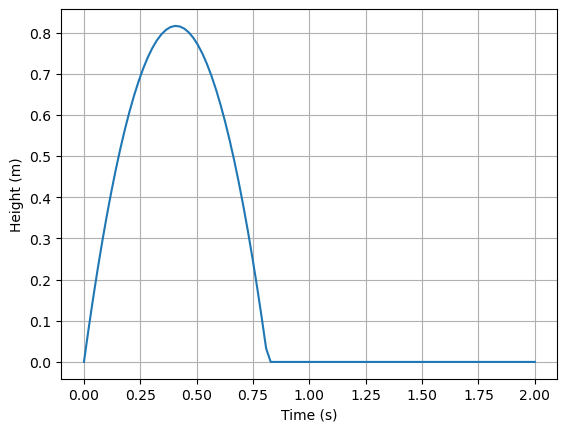

In [28]:
plt.plot(time_vals, height_vals)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.grid(True)

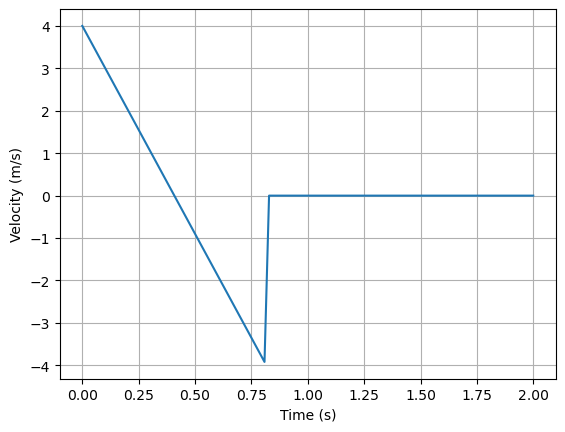

In [29]:
plt.plot(time_vals, vel_vals)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)

In [30]:
height_vals = getHeight(h_0, u, a, time_vals)
vel_vals = getVelocity(u, a, time_vals)

mask = height_vals < h_0
height_vals[mask] = h_0
vel_vals[mask] = 0

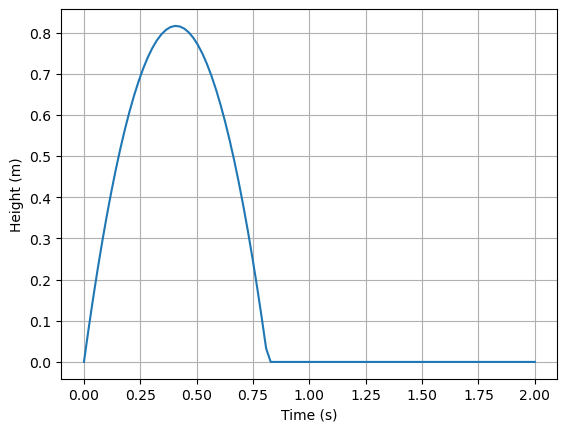

In [31]:
plt.plot(time_vals, height_vals)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.grid(True)

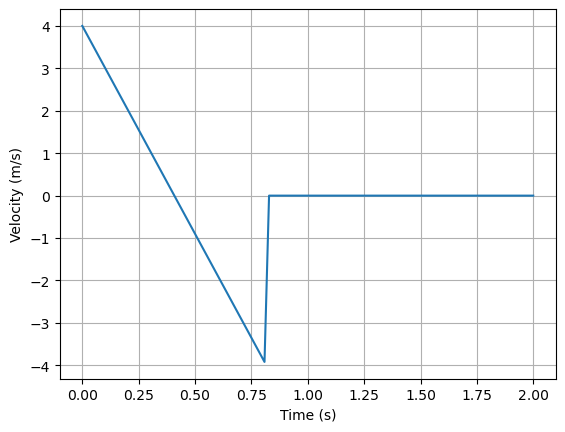

In [32]:
plt.plot(time_vals, vel_vals)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)

In [33]:
m = 1 # kg
pe_vals = m * g * height_vals # J
ke_vals = (1/2) * m * vel_vals**2 # J
te_vals = pe_vals + ke_vals

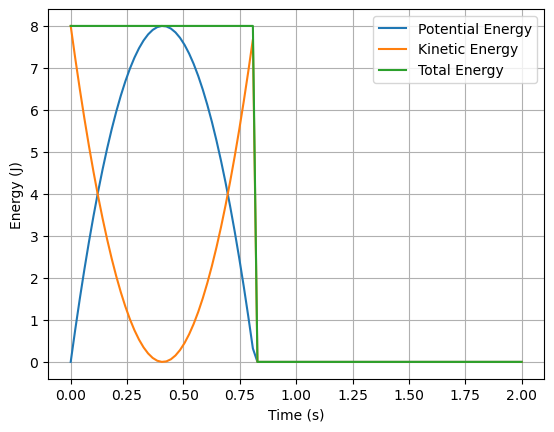

In [34]:
plt.plot(time_vals, pe_vals, label='Potential Energy')
plt.plot(time_vals, ke_vals, label='Kinetic Energy')
plt.plot(time_vals, te_vals, label='Total Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend(loc='best')
plt.grid(True)

plt.savefig("plots/energy_time.jpeg", bbox_inches='tight', dpi=300)